# COMP6013-Prac6 Neural Network Playground and tSNE Visualisation
---
In this notebook, we will play with neural networks with [NN Playground](playground.tensorflow.org) and learn how to use [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) for data visualisation.


## NN Playground
### Exercise #1: XOR data (The 2nd one)

**Task 1**: Start with the model of 1 hidden layer 1 neuron with linear activation. The NN model combines our two input features into a single neuron. Will this model learn any nonlinearities? Run it to confirm your guess.

**Task 2**: Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively?

**Task 3**: Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?

**Task 4**: Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?

Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

### Exercise #2: XOR data

This exercise uses the XOR data again, but looks at the repeatability of training Neural Nets and the importance of initialization. Use a NN with 1 hidden layer 3 hidden neurons with ReLU activation.

**Task 1**: Run the model as given four or five times. Before each trial, hit the Reset the network button to get a new random initialization. (The Reset the network button is the circular reset arrow just to the left of the Play button.) Let each trial run for at least 500 steps to ensure convergence. What shape does each model output converge to? What does this say about the role of initialization in non-convex optimization?

**Task 2**: Try making the model slightly more complex by adding a layer and a couple of extra nodes. Repeat the trials from Task 1. Does this add any additional stability to the results?

### Exercise #3: Neural Net Spiral (the last one)

This data set is a noisy spiral. Obviously, a linear model will fail here, but even manually defined feature crosses may be hard to construct.

**Task 1**: Train the best model you can, using just X1 and X2. Feel free to add or remove layers and neurons, change learning settings like learning rate, regularization rate, and batch size. What is the best test loss you can get? How smooth is the model output surface?

**Task 2**: Even with Neural Nets, some amount of feature engineering is often needed to achieve best performance. Try adding in additional cross product features or other transformations like sin(X1) and sin(X2). Do you get a better model? Is the model output surface any smoother?

---
## [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
tSNE is a dimensionality reduction technique that can be used for data visualisation.

In [5]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

# how many samples per batch to load
batch_size = 10000

# transforms to be applied when loading data
transform = transforms.ToTensor()

# doload test data
test_data = datasets.MNIST(root='DATA', train=False,
                                  download=True, transform=transform)
# prepare data loaders

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [23]:
# load test data
dataIter = iter(test_loader)
X, label = next(dataIter)
print(X.shape) # The data is currently a torch tensor

X = X.numpy() # convert to numpy array
X = X.squeeze() # remove the singleton dimension
X = X.reshape(10000, -1) # flatten the image
print(X.shape) # now a numpy array 

torch.Size([10000, 1, 28, 28])
(10000, 784)


In [21]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2,        # number of dimension after embeding
            perplexity=30,         # size of nearest neighbour (to be tuned)
            learning_rate='auto',  
            init='pca',
            n_iter=300)
X_embeded = tsne.fit_transform(X)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


t-SNE done! Time elapsed: 61.195820331573486 seconds


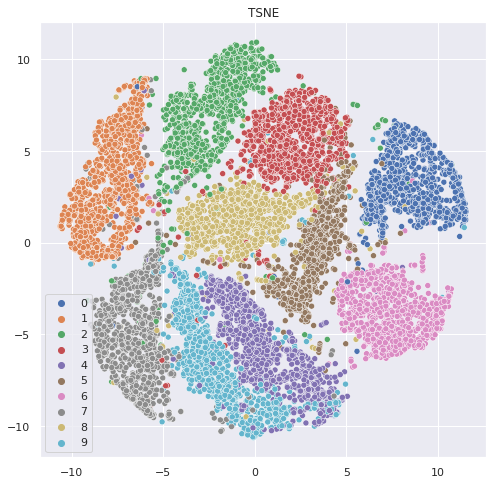

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

# Create the figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, title='TSNE of MNIST TEST SET' )

# Create the scatter
sns.scatterplot(x=X_embeded[:, 0], y=X_embeded[:, 1], hue=label, palette="deep")

## tSNE hyper-parameters

The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significantly different results.

### Exercise #4: Try use different ``perplexity`` with tSNE and see the difference.